# Central Limit Theorem Background and Goal

## Background

So far, we have begun to explore some different distributions and get a handle on how we might demonstrate what the meaning of the Central Limit Theorem is with the help of Python and various helpful libraries such as `matplotlib`, `numpy`, and `scipy`. We are coding at a higher level of abstraction where we do not need to _build_ probability distributions.

## Goal

The goal of this notebook is to demonstrate the Central Limit Theorem.

## Interpreting the Binomial Distribution in a different way. 

We begin by looking at the Binomial Distribution since we're familiar with this.

_Disclaimer: Just like for everything in this course: If it does not make 100% sense to you, then you should schedule time with me to review or ask questions in Slack._

With the Binomial Distribution, we can interpret it to have the following setup:
 1. We have a sample space $S$ that is comprised of a $1$ and a $0$.
 2. The probability of selecting $1$ is $p$, and the probability of selecting $0$ is $1-p$. This makes sense because the probabilities of the entire sample space is $1$.
 3. We can now create another sample space named $S^n$ that is the individual outcomes from sampling one item from $S$ $n$ times.
 4. Some examples of what is in $S^4$ are tuples like $(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 1)$.
 5. In our exercises, we defined a random variable that sums up the numbers in the tuple.
 6. For example, using the examples above, we did mappings like this:
    - $(1, 0, 0, 0) \rightarrow 1$
    - $(0, 1, 0, 0) \rightarrow 1$
    - $(0, 0, 1, 1) \rightarrow 2$
 7. We then computed the probability for each outcome in $S^n$ and then, after grouping by all the values that the random variable takes on, we summed up the respective probabilities.
 8. But we could've done something slightly different, like taking the average of the numbers in each tuple instead of the sum.
 9. For example, using the same examples, we could do things like this:
    - $(1, 0, 0, 0) \rightarrow \frac{1}{4}$
    - $(0, 1, 0, 0) \rightarrow \frac{1}{4}$
    - $(0, 0, 1, 1) \rightarrow \frac{1}{2}$
 10. But, taking the average is just dividing by $n$. In this way, the distribution of the average has a squished shape as the distribution of the sum, and it is squished by a factor of $n$.
 11. So when we think of what the sample mean distribution is, we are just looking at the distribution of the average.

## Graphing Sampling Distribution Sums from a S = {0, 1}, with P({1}) = p

(17.2, 3.1311339798865205)


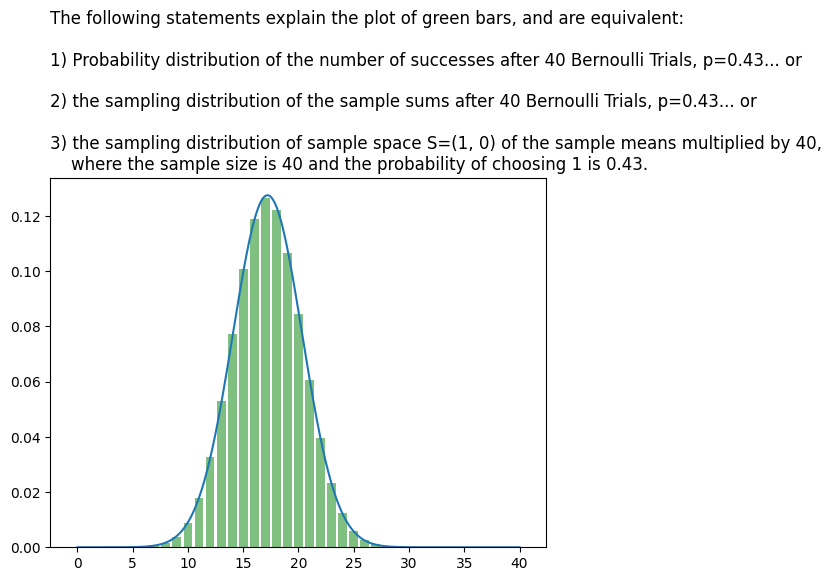

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom, norm, poisson
import matplotlib.pyplot as plt

n, p = 40, .43 # (shape) parameters of the binomial distribution

binom_rv = binom(n, p)
mean, std = binom_rv.mean(), binom_rv.std()
normal_rv = norm(mean, std) #continuous random variable
print(normal_rv.args)

x_norm = np.linspace(0, n, num=1000)
y_norm = normal_rv.pdf(x_norm)

x_binom = np.arange(0, n + 1)
y_binom = binom_rv.pmf(x_binom)

plt.plot(x_norm, y_norm)
plt.title(f'The following statements explain the plot of green bars, and are equivalent:\n\n'
          f'1) Probability distribution of the number of successes after {n} Bernoulli Trials, p={p}... or\n\n'
          f'2) the sampling distribution of the sample sums after {n} Bernoulli Trials, p={p}... or\n\n'
          f'3) the sampling distribution of sample space S={1,0} of the sample means multiplied by {n},\n'
          f'    where the sample size is {n} and the probability of choosing 1 is {p}.', loc='left')
plt.bar(x_binom, y_binom, color='g', alpha=.5)
plt.show()

# Central Limit Theorem (CLT)

## CLT Assumptions
 0. Fix your sample size, this is the number of observations in a sample. Call this number $n$.
 1. Pick any distribution, it can be either discrete or continuous.
 2. Generate $n$ observations from the SAME distribution. This is a sample.
 3. Each of the observations are independent (i.e. it doesn't matter about the other observations in the sample when generating an observation).
 4. The sample mean of this sample is a random variable.

## Ensuring Assumptions is Important

5 years is a long time to run a _happiness_ survey, especially if the 5 years is between 2005 and 2010.

(I believe that, based on some research I've seen, that social media does decrease happiness.)

Keep in mind that Facebook became "mainstream" in 2007ish...  

(I believe that the presence of social media is a confounding variable)

## CLT Says: Shape of the Sample Means is Normal.

The shape of the sample means is a normal bell curve with a specific mean and standard deviation.

### Mean

The mean is the same as the original distribution's mean.

### Standard Deviation

The standard deviation is the same as the population standard deviation divided by the squareroot of the sample size. So if the sample size is 100, the distribution of the means has a standard deviation that is $\frac{1}{10}$  of the original distribution's standard deviation.

# CLT Example: Poisson Distribution

The poisson distribution is a discrete probability distribution with one shape parameter, named $\lambda$ which is positive. (The symbol here is a lowercase Greek symbol that was made with LaTeX.)

$\lambda$ represents the rate across some period of time or space.

## Define a Poisson Distribution with `scipy`

In [2]:
RATE = 3
NUM_SAMPLES = 10**5
NUM_OBSERVATIONS = 100
NUM_BINS = 30

In [3]:
poisson_rv = poisson(RATE)

mean = poisson_rv.mean()
std = poisson_rv.std()

print(f"The mean of Poisson(rate={RATE}) is {mean}, and its variance is {round(std**2, 7)}.")

The mean of Poisson(rate=3) is 3.0, and its variance is 3.0.


## Graph a Poisson Distribution with `matplotlib`

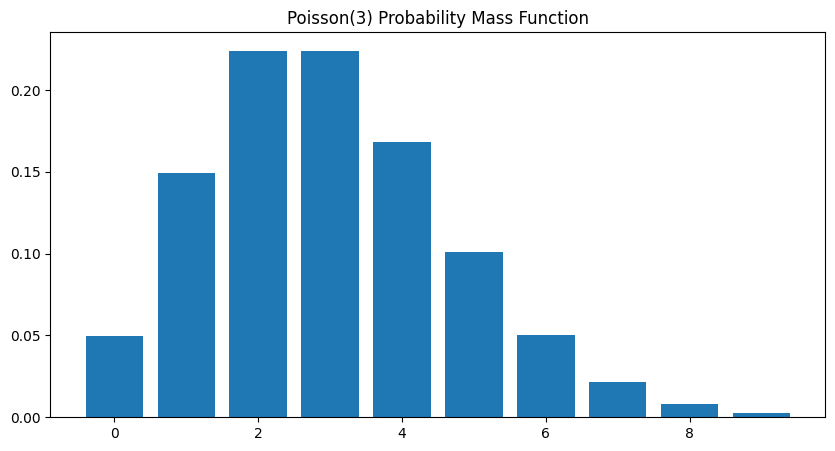

In [4]:
x_poisson = np.arange(10)
y_poisson = poisson_rv.pmf(x_poisson)

plt.figure(figsize=(10, 5))
plt.bar(x_poisson, y_poisson)
_ = plt.title(f'Poisson({RATE}) Probability Mass Function')

## Sample from the Poisson Distribution to create an 2d-array of observations

### Create a 2d-array with shape 

In [5]:
all_observations = poisson_rv.rvs(size=NUM_OBSERVATIONS * NUM_SAMPLES)
all_observations = all_observations.reshape((NUM_OBSERVATIONS, NUM_SAMPLES))
all_observations

array([[3, 1, 2, ..., 2, 4, 2],
       [3, 6, 4, ..., 3, 2, 1],
       [7, 2, 7, ..., 2, 6, 4],
       ...,
       [2, 3, 3, ..., 3, 7, 2],
       [4, 3, 2, ..., 3, 2, 1],
       [2, 3, 2, ..., 3, 1, 4]])

## Use a Pandas DataFrame to, hopefully, better understand the data organization

In [6]:
column_names = [f'sample_{i}' for i in range(NUM_SAMPLES)]
samples_df = pd.DataFrame(all_observations, 
                       columns=pd.Index(data=column_names, name='samples'),
                       index=pd.Index(data=range(NUM_OBSERVATIONS), name='observations'))
samples_df

samples,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_99990,sample_99991,sample_99992,sample_99993,sample_99994,sample_99995,sample_99996,sample_99997,sample_99998,sample_99999
observations,,,,,,,,,,,,,,,,,,,,,
0,3,1,2,3,3,5,6,2,3,2,...,2,7,2,4,5,3,1,2,4,2
1,3,6,4,1,3,5,4,3,4,2,...,0,4,5,5,1,5,2,3,2,1
2,7,2,7,3,5,7,2,4,1,1,...,2,4,2,6,2,7,1,2,6,4
3,1,1,2,2,2,2,1,5,0,5,...,5,5,3,5,3,1,1,3,2,4
4,0,6,2,2,1,3,1,6,2,4,...,4,4,6,3,2,1,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,3,2,4,3,4,3,2,1,5,...,7,3,2,1,1,3,5,1,2,2
96,0,3,3,4,3,1,2,3,3,1,...,4,6,1,5,5,1,5,2,3,4
97,2,3,3,1,0,1,2,1,5,6,...,0,1,6,1,2,4,4,3,7,2


## Compute Sample Means

In [7]:
sample_means = samples_df.mean() # Read the docstring for the `mean` function to see what this does after guessing
sample_means.name = 'sample_means'
sample_means

samples
sample_0        2.71
sample_1        3.22
sample_2        3.16
sample_3        2.83
sample_4        3.15
                ... 
sample_99995    3.16
sample_99996    2.99
sample_99997    2.67
sample_99998    2.85
sample_99999    2.69
Name: sample_means, Length: 100000, dtype: float64

## Generate the histogram of sample means

### Generate counts and bin points

In [8]:
counts, bins = np.histogram(sample_means, bins=NUM_BINS)
width = bins[1] - bins[0]

### Normalize the area under the histogram

Here we divide the heights (or counts) by the total area of the rectangles so that we can create a histogram with the area under the curve as 1 (so that it can be approximated by a proper _probability density function_).

In [9]:
area_under_counts = (counts*width).sum()
normalized_heights = counts/area_under_counts

## Creating the corresponding normal distribution

1. Remember, this is an approximation of the distribution of sample means
2. Another word for "normal" is _Gaussian_.

In [10]:
x = np.linspace(bins.min(), bins.max(), num=1000)
norm_rv = norm(mean, std/np.sqrt(NUM_OBSERVATIONS))

## Graph the results

### Graphing the normal distribution and the empirical distribution of sample means

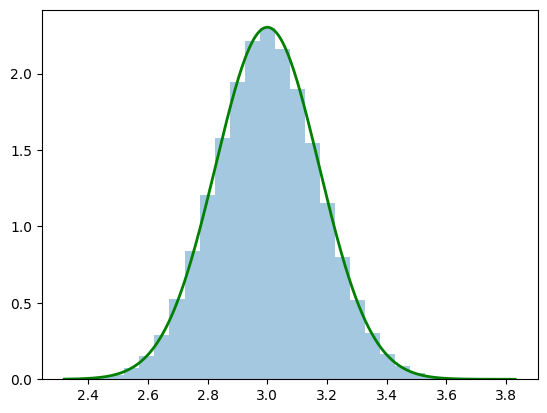

In [11]:
fig, ax = plt.subplots()
ax.hist(bins[:-1], bins, weights=normalized_heights, alpha=.4)
ax.plot(x, norm_rv.pdf(x), color='g', linewidth=2)

# CLT Example: Mixture Distribution

You can make a distribution from more than one other distributions.

## New Library! `statsmodels`

Look it up!

In [12]:
# https://github.com/statsmodels/statsmodels/blob/main/statsmodels/distributions/mixture_rvs.py
from statsmodels.distributions.mixture_rvs import mixture_rvs

## Sample From The Mixture Distribution

We will sample from a population in the following way:
 1. Flip a coin with a 5:2 odds of landing on heads.
 2. If heads, then sample from a normal distribution with mean 10 and standard deviation 2
 3. If tails, then sample from a normal distribution with mean 1 and standard deviation 8

In [13]:
weights = [5, 2]
probabilities = weights/np.sum(weights)
size = NUM_OBSERVATIONS * NUM_SAMPLES
samples = mixture_rvs(probabilities, size,
    dist=[norm, norm],
    kwargs=(
        dict(loc=10, scale=2),
        dict(loc=1, scale=8)
    )
)

## Compute Sample Means

In [14]:
sample_means = samples.reshape(NUM_OBSERVATIONS, NUM_SAMPLES).mean(0)
sample_means

array([7.73572357, 8.24509532, 7.64292624, ..., 6.30143054, 7.20206095,
       8.57488768])

## Create 2 graphs side-by-side

 1. Graph the empirical mixture distribution from the samples generated
 2. Graph the sampling distribution of the sample mean with a Gaussian overlayed

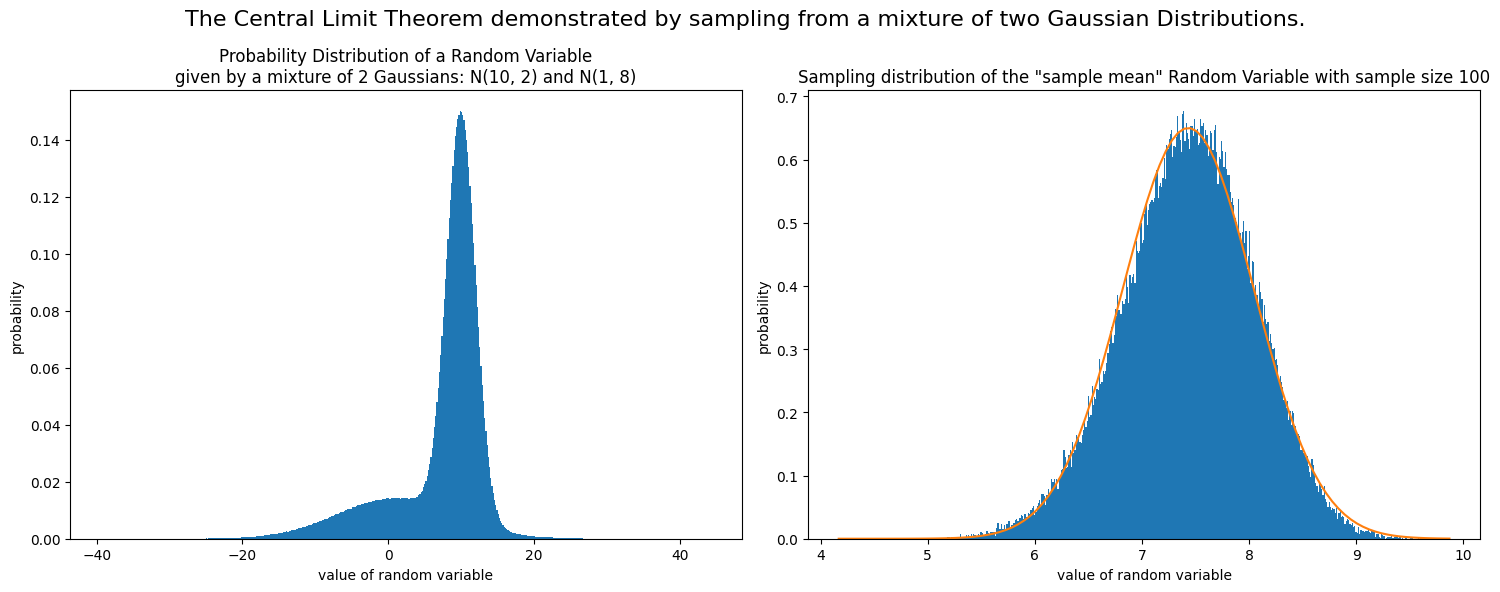

In [15]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('The Central Limit Theorem demonstrated by sampling '
             'from a mixture of two Gaussian Distributions.', fontsize=16)

# graph empirical distribution (should look pretty close to the real thing)
sample_probabilities, sample_bins = np.histogram(samples, bins=500, density=True)
ax_1.hist(sample_bins[:-1], sample_bins, weights=sample_probabilities)
ax_1.set_ylabel('probability')
ax_1.set_xlabel('value of random variable')
ax_1.set_title('Probability Distribution of a Random Variable\n'
               'given by a mixture of 2 Gaussians: N(10, 2) and N(1, 8)')

# graph sampling distribution of the sample mean
sample_mean_probabilities, sample_mean_bins = np.histogram(sample_means, bins=500, density=True)
ax_2.hist(sample_mean_bins[:-1], sample_mean_bins, weights=sample_mean_probabilities)

# graph normal approximation
x = np.linspace(sample_mean_bins.min(), sample_mean_bins.max(), num=100)
ax_2.plot(x, norm.pdf(x, samples.mean(), samples.std()/np.sqrt(NUM_OBSERVATIONS)))
ax_2.set_ylabel('probability')
ax_2.set_xlabel('value of random variable')
ax_2.set_title(f'Sampling distribution of the "sample mean" Random Variable with sample size {NUM_OBSERVATIONS}')

plt.tight_layout()

# Conclusion

In this notebook, we have created visuals demonstrating the Central Limit Theorem. Basically, it is always the case that the sampling distribution of the sample mean is a Gaussian.